# Assignment 1 Amazon Review Dataset

7130ICT - Data Analytics

Trimester 1 - 2021

s5172620 - Julio Pimentel Albores

s5198626 - Gabriela Almeida Monteiro

Due: Friday, 28 May 2021

## Table of contents
* [Part 1 –Basic analysis](#part1)

    * [1.1) Exploring electronics dataset](#part1.1)
        * [1.1.1) Data cleaning](#part1.1.1)
        * [1.1.2) Creation of Tablet dataset](#part1.1.2)
    * [1.2) Exploring Tablet dataset](#part1.2)
        * [1.2.1) Filtering accessories](#part1.2.1)
        * [1.2.2) Data cleaning of Tablet dataset](#part1.2.2)
        * [1.2.3) Descriptive statistics of Tablet dataset](#part1.2.3)
    * [1.3) Hypotesis](#part1.3)
* [Part 2 – Advanced Analysis](#part2)
    * [2.1) Exploratory Analysis](#part2.1)
        * [2.1.1) Brand Analysis](#part2.1.1)
        * [2.1.2) Product Analysis](#part2.1.2)
        * [2.1.3) Feature Correlation Analysis](#part2.1.3)
    * [2.2) Sentiment Analysis](#part2.2)
        * [2.2.1) Sentiment analysis across time](#part2.2.1)
        * [2.2.2) BTF-IDF analysis for all dataset](#part2.2.2)
        * [2.2.3) TF-IDF analysis for positive sentiment](#part2.2.3)
        * [2.2.4) TF-IDF analysis for negative sentiment](#part2.2.4)
    * [2.3) Time Series Analysis](#part2.3)
        * [2.3.1) Cyclical events](#part2.3.1)
    
  
  The files 'reviews_Electronics_5.json.gz' and 'meta_Electronics.json.gz' are required to start the code from part 1.1. The file 'assignment_tablet_data.pkl' is required to start the code from part 1.2.

## Part 1 –Basic analysis  <a class="anchor" id="part1"></a>

## 1.1) Exploring electronics dataset <a class="anchor" id="part1.1"></a>

In [1]:
#import libraries
import pandas as pd
import gzip

In [2]:
#Amazon Review Dataset
#Electronics category

#Pandas data frame
#These functions read the data into a pandas data frame (http://jmcauley.ucsd.edu/data/amazon/)
    
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

reviews_df = getDF('reviews_Electronics_5.json.gz')

reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [3]:
# We are going to use only reviewerID for review references.

print("The shape of the dataset is {:,} rows and {} columns".format(reviews_df.shape[0],reviews_df.shape[1]))
print("The oldest post is from:", reviews_df['reviewTime'].min())
print("The newest post is from:", reviews_df['reviewTime'].max())
print("There are {:,} unique users ID who left a review.".format(reviews_df['reviewerID'].nunique()))
print("There are {:,} unique users Names who left a review.".format(reviews_df['reviewerName'].nunique()))
print("There are {:,} unique items.".format(reviews_df['asin'].nunique()))
print("The average rating given by customers is {:.2f}".format(reviews_df['overall'].mean()))

The shape of the dataset is 1,689,188 rows and 9 columns
The oldest post is from: 01 1, 2000
The newest post is from: 12 9, 2013
There are 192,403 unique users ID who left a review.
There are 162,859 unique users Names who left a review.
There are 63,001 unique items.
The average rating given by customers is 4.22


In [4]:
#statistical information of float/int columns
#overall values are between 1 and 5 with a mean of 4.22
#unixReviewTime is an int value of date time. It needs to be transformed.

reviews_df.describe()

,overall,unixReviewTime
count,1.689188e+06,1.689188e+06
mean,4.222779e+00,1.340571e+09
std,1.185632e+00,6.342451e+07
min,1.000000e+00,9.292320e+08
25%,4.000000e+00,1.318118e+09
50%,5.000000e+00,1.360800e+09
75%,5.000000e+00,1.385078e+09
max,5.000000e+00,1.406074e+09


In [5]:
#most of the attributes types are object. However, overall and unixReviewTime have a numerical structure. 

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1689188 non-null  object 
 1   asin            1689188 non-null  object 
 2   reviewerName    1664458 non-null  object 
 3   helpful         1689188 non-null  object 
 4   reviewText      1689188 non-null  object 
 5   overall         1689188 non-null  float64
 6   summary         1689188 non-null  object 
 7   unixReviewTime  1689188 non-null  int64  
 8   reviewTime      1689188 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 128.9+ MB


In [6]:
# As seen above, the column reviewerName has some null-values which can be confirmed by: 
reviews_df['reviewerName'].isna().sum()

24730

In [7]:
#check the column "timeFormat" makes sense with the column "reviewTime"
reviews_df.head()

#the most relevant attributes are: reviewerID, reviewerName, overall, and timeFormat
#reviewText and summary have interesting information but it is unstructured
#the hypothesis is that we can predict the rating of a product based on item or user approach

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [8]:
# Now, we will look at the electronics metadata
metadata_df = getDF('meta_Electronics.json.gz')

metadata_df.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [9]:
metadata_df.shape

(498196, 9)

In [10]:
# we will merge both dataframes using the product ID (asin) as a unifier.
# we will save the merged dataframe in a new variable called df
df_electronics = pd.merge(reviews_df, metadata_df, how='inner', on='asin')

In [11]:
df_electronics.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [12]:
# As expected, the merged dataframe has the same number of rows, but has 18 columns.

df_electronics.shape

(1689188, 17)

In [13]:
df_electronics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1689188 non-null  object 
 1   asin            1689188 non-null  object 
 2   reviewerName    1664458 non-null  object 
 3   helpful         1689188 non-null  object 
 4   reviewText      1689188 non-null  object 
 5   overall         1689188 non-null  float64
 6   summary         1689188 non-null  object 
 7   unixReviewTime  1689188 non-null  int64  
 8   reviewTime      1689188 non-null  object 
 9   imUrl           1687975 non-null  object 
 10  description     1655511 non-null  object 
 11  categories      1689188 non-null  object 
 12  title           1643686 non-null  object 
 13  price           1639882 non-null  float64
 14  salesRank       810070 non-null   object 
 15  related         1662142 non-null  object 
 16  brand           954251 non-null   ob

### 1.1.1) Data cleaning <a class="anchor" id="part1.1.1"></a>

In [14]:
#new attribute created with datetime format
df_electronics["timeFormat"] = pd.to_datetime(df_electronics["unixReviewTime"], unit='s')

In [28]:
# source: https://datatofish.com/count-nan-pandas-dataframe/
# There are 45502 product titles that are null-values, as confirmed by:
df_electronics['title'].isna().sum()

45502

In [29]:
# Instead of dropping the observations that are null, we will reasign the dataframe with all rows that do not have
# null values in the column 'title':
# source: https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/#:~:text=To%20drop%20a%20specific%20row,to%20the%20Pandas%20drop%20function.&text=%23%20delete%20a%20few%20specified%20rows,always%20align%20to%20row%20numbers.&text=It%20can%20be%20useful%20for,have%20a%20more%20meaningful%20index.
df_electronics = df_electronics.loc[df_electronics['title'].isna() != True]

In [30]:
# Now, if we check the dataframe again, we will see that, as expected, there are no more null values in the column title.
df_electronics['title'].isna().sum()

0

In [34]:
df_electronics.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",2013-06-02,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",2010-11-25,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",2010-09-09,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",2010-11-24,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",2011-09-29,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


### 1.1.2) Creation of Tablet dataset <a class="anchor" id="part1.1.2"></a>

In [41]:
#There are 81,453 products related to "ipad"
df_electronics[df_electronics['title'].str.contains("ipad")].shape

(81453, 18)

In [42]:
#however, only 15,871 of 81,453 (19%) are related to "tablet" as well. 
ipad=df_electronics[df_electronics['title'].str.contains("ipad")]

ipad[ipad['title'].str.contains("tablet")].shape

(15871, 18)

In [43]:
#We transform the 'title' column in lower case. 
df_electronics['title']=df_electronics['title'].str.lower()

# Now we want to filter out the observations containing the keywords: 'tablet' and "ipad"
df_tablet = df_electronics[df_electronics['title'].str.contains("tablet") | df_electronics['title'].str.contains("ipad")]

#We can use the file assignment_tablet_data.pkl to avoid loading the whole electronics dataset
df_tablet.to_pickle('assignment_tablet_data.pkl')

## 1.2) Exploring Tablet dataset <a class="anchor" id="part1.2"></a>

For this section, we would only require the pkl file, rather than ratings and metadata datasets. 

In [1]:
import pandas as pd
import numpy as np

#read pkl file of tablet and ipad items. 
df_all = pd.read_pickle('assignment_tablet_data.pkl')

df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135939 entries, 237 to 1689141
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   reviewerID      135939 non-null  object        
 1   asin            135939 non-null  object        
 2   reviewerName    134726 non-null  object        
 3   helpful         135939 non-null  object        
 4   reviewText      135939 non-null  object        
 5   overall         135939 non-null  float64       
 6   summary         135939 non-null  object        
 7   unixReviewTime  135939 non-null  int64         
 8   reviewTime      135939 non-null  object        
 9   timeFormat      135939 non-null  datetime64[ns]
 10  imUrl           135939 non-null  object        
 11  description     131393 non-null  object        
 12  categories      135939 non-null  object        
 13  title           135939 non-null  object        
 14  price           134910 non-null  

In [2]:
df_all.describe()

,overall,unixReviewTime,price
count,135939.000000,1.359390e+05,134910.000000
mean,4.190247,1.366043e+09,45.278070
std,1.170919,3.096553e+07,81.089161
min,1.000000,1.010966e+09,0.010000
25%,4.000000,1.352506e+09,9.950000
50%,5.000000,1.371773e+09,17.990000
75%,5.000000,1.389658e+09,38.440000
max,5.000000,1.406074e+09,850.000000


### 1.2.1) Filtering accessories <a class="anchor" id="part1.2.1"></a>

In [60]:
# We can see that there are items which have a very low price and probably are accessories. So we have to get hid of
# them for our analysis, which will mainly focus on tablets and not it's accessories. 
# After checking the amazon website, it was noticed that the prices lower than 250 are include lots of accessories. 
# Therefore, this will be out cut line.
# amazon website: https://www.amazon.com.br/s?keywords=Tablets&i=computers&rh=n%3A16364762011%2Cp_36%3A17270935011&dc&_encoding=UTF8&c=ts&qid=1618802074&rnid=17270933011&ts_id=16364762011&ref=sr_nr_p_36_2

# Here we filter only the reviews for products costing more than 250 and reasign our variable df_tablet with these observations.

df_tab = df_all[df_all['price']>250]

df_tab.describe()

,overall,unixReviewTime,price
count,5822.000000,5.822000e+03,5822.000000
mean,4.185847,1.356505e+09,364.508822
std,1.206758,3.762778e+07,104.932877
min,1.000000,1.122941e+09,254.990000
25%,4.000000,1.329350e+09,279.990000
50%,5.000000,1.362960e+09,349.990000
75%,5.000000,1.388016e+09,419.000000
max,5.000000,1.406074e+09,850.000000


In [5]:
print("The shape of the dataset is {:,} rows and {} columns".format(df_tab.shape[0],df_tab.shape[1]))
# print("The oldest post is from:", df_tab['reviewTime'].min()) --> output: The oldest post is from: 01 1, 2008
# print("The newest post is from:", df_tab['reviewTime'].max()) --> output: The newest post is from: 12 9, 2013
print("The oldest post is from: {0:%d/%m/%y}".format(df_tab['timeFormat'].min()))
print("The newest post is from: {0:%d/%m/%y}".format(df_tab['timeFormat'].max()))
print("There are {:,} unique users ID who left a review.".format(df_tab['reviewerID'].nunique()))
print("There are {:,} unique users Names who left a review.".format(df_tab['reviewerName'].nunique()))
print("The average rating given by customers is {:.2f}".format(df_tab['overall'].mean()))

The shape of the dataset is 5,822 rows and 18 columns
The oldest post is from: 01 1, 2008
The newest post is from: 12 9, 2013
There are 5,306 unique users ID who left a review.
There are 4,996 unique users Names who left a review.
The average rating given by customers is 4.19


### 1.2.2) Data cleaning of tablet dataset <a class="anchor" id="part1.2.2"></a>

In [61]:
# We can see that there are 2738 non null values for brand (out of 4180 observations). 
df_tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 123734 to 1688828
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      5822 non-null   object        
 1   asin            5822 non-null   object        
 2   reviewerName    5817 non-null   object        
 3   helpful         5822 non-null   object        
 4   reviewText      5822 non-null   object        
 5   overall         5822 non-null   float64       
 6   summary         5822 non-null   object        
 7   unixReviewTime  5822 non-null   int64         
 8   reviewTime      5822 non-null   object        
 9   timeFormat      5822 non-null   datetime64[ns]
 10  imUrl           5822 non-null   object        
 11  description     5817 non-null   object        
 12  categories      5822 non-null   object        
 13  title           5822 non-null   object        
 14  price           5822 non-null   float64       
 

In [6]:
# In order to solve this problem we will fill in the blank cells from the brand using the 
# first words from the title of the product, which we can see below:
df_tab.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand
123734,A1LIHSIZX7XMFI,B00030097G,"1elementin7groups ""Dave""","[1, 1]",I use this with both Corel Painter and Photosh...,5.0,A must for Corel Painter,1258243200,"11 15, 2009",2009-11-15,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",NaN
123735,A1SK74JE9P6T2Z,B00030097G,Amazon Customer,"[15, 16]",Great product for anyone that has to spend lot...,4.0,saved my messed up wrists...,1122940800,"08 2, 2005",2005-08-02,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",NaN
123736,A2P0JWQ7NAH8KQ,B00030097G,"Amazon Customer ""K.T""","[0, 0]",this is the real deal... simply... don't go ch...,5.0,perfection in action,1236038400,"03 3, 2009",2009-03-03,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",NaN
123737,A1JY3R1T6Y209Z,B00030097G,BEST F'ING REVIEWER TO REVIEW,"[1, 1]","Quality product, functions great (more than i ...",5.0,own a Intuos and never look back!,1304035200,"04 29, 2011",2011-04-29,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",NaN
123738,A168KEW1CICAR1,B00030097G,"Bet ""gadget getter""","[1, 1]",Love it! I've gotten so used to using the sty...,5.0,graphic tablet,1185494400,"07 27, 2007",2007-07-27,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",NaN


In [7]:
def generate_brand(product_title):
    """
    Takes the title of the product in the title column and uses the
    first word in order to populate the null cells in the 'brand' column.
    """
    generated_brand = product_title.split()[0].capitalize()
    return generated_brand


# Now, we can use the pandas apply function to apply to generate values to the newly created  column.    
df_tab['brand'].fillna(value=df_tab['title'].apply(generate_brand), inplace=True)



df_tab.head()

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand
123734,A1LIHSIZX7XMFI,B00030097G,"1elementin7groups ""Dave""","[1, 1]",I use this with both Corel Painter and Photosh...,5.0,A must for Corel Painter,1258243200,"11 15, 2009",2009-11-15,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom
123735,A1SK74JE9P6T2Z,B00030097G,Amazon Customer,"[15, 16]",Great product for anyone that has to spend lot...,4.0,saved my messed up wrists...,1122940800,"08 2, 2005",2005-08-02,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom
123736,A2P0JWQ7NAH8KQ,B00030097G,"Amazon Customer ""K.T""","[0, 0]",this is the real deal... simply... don't go ch...,5.0,perfection in action,1236038400,"03 3, 2009",2009-03-03,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom
123737,A1JY3R1T6Y209Z,B00030097G,BEST F'ING REVIEWER TO REVIEW,"[1, 1]","Quality product, functions great (more than i ...",5.0,own a Intuos and never look back!,1304035200,"04 29, 2011",2011-04-29,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom
123738,A168KEW1CICAR1,B00030097G,"Bet ""gadget getter""","[1, 1]",Love it! I've gotten so used to using the sty...,5.0,graphic tablet,1185494400,"07 27, 2007",2007-07-27,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom


In [8]:
'''JULIO HAVE A LOOK AT THIS PART OF THE CODE WHERE I DROP THE DUPLICATES AND THE ROWS WITH NULL VALUES FOR PRICE,
DESCRIPTION AND RELATED'''

# # Now we will drop duplicates based on specific columns: reviewerName, unixReviewTime, asin. And we will keep the last
# # occurence.
# df.drop_duplicates(subset=['reviewerName', 'unixReviewTime', 'asin'], keep='last', inplace=True)

# # Drop all observations that have null values in the columns "“reviewerName”,”price”,”description”,”related”"
# df.dropna(subset=['price', 'description', 'related'], inplace=True)

'JULIO HAVE A LOOK AT THIS PART OF THE CODE WHERE I DROP THE DUPLICATES AND THE ROWS WITH NULL VALUES FOR PRICE,\nDESCRIPTION AND RELATED'

In [9]:
# Amazon's ratings score scale range from 1 to 5, being:
# 1 = "I hate it" 
# 2 = "I don't like it"
# 3 = "It's okay"
# 4 = "I like it"
# 5 = "I love it!" 

#Transform overall score above 3 as positive, and below 3 as negative
df_tab["sentiment"]=np.where(df_tab["overall"]>3,1,0)
df_tab.head()

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand,sentiment
123734,A1LIHSIZX7XMFI,B00030097G,"1elementin7groups ""Dave""","[1, 1]",I use this with both Corel Painter and Photosh...,5.0,A must for Corel Painter,1258243200,"11 15, 2009",2009-11-15,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1
123735,A1SK74JE9P6T2Z,B00030097G,Amazon Customer,"[15, 16]",Great product for anyone that has to spend lot...,4.0,saved my messed up wrists...,1122940800,"08 2, 2005",2005-08-02,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1
123736,A2P0JWQ7NAH8KQ,B00030097G,"Amazon Customer ""K.T""","[0, 0]",this is the real deal... simply... don't go ch...,5.0,perfection in action,1236038400,"03 3, 2009",2009-03-03,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1
123737,A1JY3R1T6Y209Z,B00030097G,BEST F'ING REVIEWER TO REVIEW,"[1, 1]","Quality product, functions great (more than i ...",5.0,own a Intuos and never look back!,1304035200,"04 29, 2011",2011-04-29,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1
123738,A168KEW1CICAR1,B00030097G,"Bet ""gadget getter""","[1, 1]",Love it! I've gotten so used to using the sty...,5.0,graphic tablet,1185494400,"07 27, 2007",2007-07-27,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1


In [10]:
#Transform the list within "helpful" column in a ratio
lst_help=[]
for i in df_tab["helpful"]:
    #if there is no data, use nan value to avoid division by 0
    if i[1]==0:
        lst_help.append(np.nan)
    else:
        lst_help.append(i[0]/i[1])
#add the list in a new column         
df_tab["helpfulRatio"]=lst_help

df_tab.head()



/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand,sentiment,helpfulRatio
123734,A1LIHSIZX7XMFI,B00030097G,"1elementin7groups ""Dave""","[1, 1]",I use this with both Corel Painter and Photosh...,5.0,A must for Corel Painter,1258243200,"11 15, 2009",2009-11-15,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,1.0000
123735,A1SK74JE9P6T2Z,B00030097G,Amazon Customer,"[15, 16]",Great product for anyone that has to spend lot...,4.0,saved my messed up wrists...,1122940800,"08 2, 2005",2005-08-02,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,0.9375
123736,A2P0JWQ7NAH8KQ,B00030097G,"Amazon Customer ""K.T""","[0, 0]",this is the real deal... simply... don't go ch...,5.0,perfection in action,1236038400,"03 3, 2009",2009-03-03,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,NaN
123737,A1JY3R1T6Y209Z,B00030097G,BEST F'ING REVIEWER TO REVIEW,"[1, 1]","Quality product, functions great (more than i ...",5.0,own a Intuos and never look back!,1304035200,"04 29, 2011",2011-04-29,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,1.0000
123738,A168KEW1CICAR1,B00030097G,"Bet ""gadget getter""","[1, 1]",Love it! I've gotten so used to using the sty...,5.0,graphic tablet,1185494400,"07 27, 2007",2007-07-27,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,1.0000


In [11]:
#Including a month-year column 
df_tab["month_year"]=df_tab["timeFormat"].dt.to_period("M")
df_tab.head()

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,...,description,categories,title,price,salesRank,related,brand,sentiment,helpfulRatio,month_year
123734,A1LIHSIZX7XMFI,B00030097G,"1elementin7groups ""Dave""","[1, 1]",I use this with both Corel Painter and Photosh...,5.0,A must for Corel Painter,1258243200,"11 15, 2009",2009-11-15,...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,1.0000,2009-11
123735,A1SK74JE9P6T2Z,B00030097G,Amazon Customer,"[15, 16]",Great product for anyone that has to spend lot...,4.0,saved my messed up wrists...,1122940800,"08 2, 2005",2005-08-02,...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,0.9375,2005-08
123736,A2P0JWQ7NAH8KQ,B00030097G,"Amazon Customer ""K.T""","[0, 0]",this is the real deal... simply... don't go ch...,5.0,perfection in action,1236038400,"03 3, 2009",2009-03-03,...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,NaN,2009-03
123737,A1JY3R1T6Y209Z,B00030097G,BEST F'ING REVIEWER TO REVIEW,"[1, 1]","Quality product, functions great (more than i ...",5.0,own a Intuos and never look back!,1304035200,"04 29, 2011",2011-04-29,...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,1.0000,2011-04
123738,A168KEW1CICAR1,B00030097G,"Bet ""gadget getter""","[1, 1]",Love it! I've gotten so used to using the sty...,5.0,graphic tablet,1185494400,"07 27, 2007",2007-07-27,...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,1.0000,2007-07


In [12]:
#Drop all columns that will not be used on the analysis

df_tab=df_tab.drop(columns=["reviewerName","helpful","unixReviewTime","reviewTime","salesRank","imUrl"])
df_tab.head()

,reviewerID,asin,reviewText,overall,summary,timeFormat,description,categories,title,price,related,brand,sentiment,helpfulRatio,month_year
123734,A1LIHSIZX7XMFI,B00030097G,I use this with both Corel Painter and Photosh...,5.0,A must for Corel Painter,2009-11-15,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,1.0000,2009-11
123735,A1SK74JE9P6T2Z,B00030097G,Great product for anyone that has to spend lot...,4.0,saved my messed up wrists...,2005-08-02,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,0.9375,2005-08
123736,A2P0JWQ7NAH8KQ,B00030097G,this is the real deal... simply... don't go ch...,5.0,perfection in action,2009-03-03,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,NaN,2009-03
123737,A1JY3R1T6Y209Z,B00030097G,"Quality product, functions great (more than i ...",5.0,own a Intuos and never look back!,2011-04-29,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,1.0000,2011-04
123738,A168KEW1CICAR1,B00030097G,Love it! I've gotten so used to using the sty...,5.0,graphic tablet,2007-07-27,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,"{'also_bought': ['B00083Y85C', '0955153077', '...",Wacom,1,1.0000,2007-07


### 1.2.3) Descriptive statistics of Tablet dataset <a class="anchor" id="part1.2.3"></a>

In [13]:
# Descriptive statistics

# Now that we finished cleaning our dataset, let's have a look at it.

print("================ Descriptive Statistics ================")
print()
print("The shape of the dataset is {:,} rows and {} columns.".format(df_tab.shape[0],df_tab.shape[1]))
print("The oldest post is from: {:%d/%m/%y}".format(df_tab['timeFormat'].min()))
print("The newest post is from: {:%d/%m/%y}".format( df_tab['timeFormat'].max()))
print("There are {:,} unique users ID who left a review.".format(df_tab['reviewerID'].nunique()))
print("There are {:,} unique products.".format(df_tab['title'].nunique()))
print("There are {:,} unique brands.".format(df_tab['brand'].nunique()))
print("There are {:,} good reviews.".format((df_tab['sentiment']==1).sum()))
print("There are {:,} bad reviews.".format((df_tab['sentiment']==0).sum()))
print("The average rating given by customers is {:.2f}.".format(df_tab['overall'].mean()))

================ Descriptive Statistics ================

The shape of the dataset is 5,822 rows and 15 columns.
The oldest post is from: 2005-08-02 00:00:00
The newest post is from: 2014-07-23 00:00:00
There are 5,306 unique users ID who left a review.
There are 116 unique products.
There are 36 unique brands.
There are 4,608 good reviews.
There are 1,214 bad reviews.
The average rating given by customers is 4.19.


## 1.3) Hypothesis <a class="anchor" id="part1.3"></a>

In [ ]:
# Hypothesis

# Assess their popularity with the customers - which product is more popular

# How have large events in society affected the number of reviews or the reviews' sentiment? - large events in society affects the purchasing behaviour of customers and its review. large event = define us events - us elections - economic crisis - wars - apple (companies) releases - katrina

# cyclical eventss (holidays, seasons, etc) modified purchasing behaviour

# there is a correlation between specific times of the day and purchasing behaviour

# Predicting ratings based on reviews

# Usefulness on large volume of reviews

# Rating vs number of reviews

# Rating vs proportion of reviews

# Helpful proportion vs Number of reviews

# Rating vs helpfulness ratio

# Top 20 most reviewed products

# Bottom 20 reviewed products

# Positive and negative words

# World cloud for different ratings, brand name etc

# Part 2: Advanced Analysis <a class="anchor" id="part2"></a>

## 2.1) Exploratory Analysis <a class="anchor" id="part2.1"></a>

### 2.1.1) Brand Analysis <a class="anchor" id="part2.1.1"></a>

Text(0, 0.5, 'Number of Reviews')

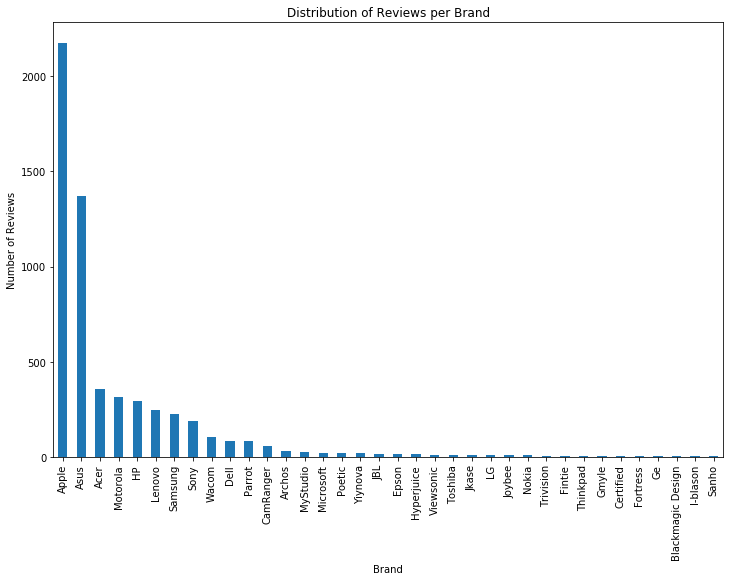

In [15]:
# We will look at the number of reviews received by each brand.

plt.figure(figsize=(12,8))
df_tab['brand'].value_counts().plot(kind='bar')
plt.title('Distribution of Reviews per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Reviews')


'Apple and Asus are way ahead of their concurrents in terms of reviews.'

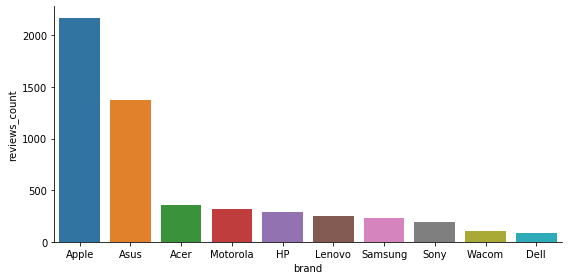

In [16]:
#We filter the top 10 brands with the highest number of reviews.
top_10_brands = pd.DataFrame(df_tab['brand'].value_counts()[:10])
top_10_brands.reset_index(inplace=True)
top_10_brands.columns= ['brand', 'reviews_count']
top_10_brands

# We plot the top 10 brands, by number of reviews received.
g = sns.catplot(x="brand", y="reviews_count",
                data=top_10_brands, kind="bar",
                height=4, aspect=2);

'''Apple and Asus are way ahead of their concurrents in terms of reviews.'''


'Analysis: All top 10 brands have more positive than negative reviews. However, Apple and Asus show a significant\nnumber of positive reviews compared to negative. In fact, from the plot, we can see that the more reviews you have,\nmore likely you are of having positive reviews, and therefore, being at the top.'

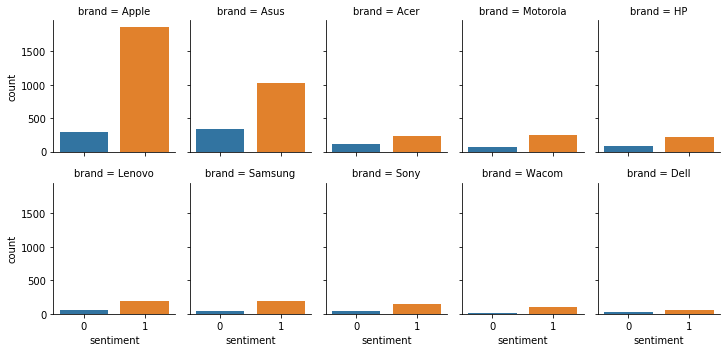

In [17]:
# We look at the number of positive and negative reviews for the top 10 most reviewed brands.


list_10 = top_10_brands['brand'].unique()

subset_df_top_10_brands = df_tab[df_tab['brand'].isin(list_10)]

g = sns.catplot(x="sentiment", col="brand", col_wrap=5,
                data=subset_df_top_10_brands,
                kind="count", height=2.5, aspect=.8, col_order=list_10)

'''Analysis: All top 10 brands have more positive than negative reviews. However, Apple and Asus show a significant
number of positive reviews compared to negative. In fact, from the plot, we can see that the more reviews you have,
more likely you are of having positive reviews, and therefore, being at the top.'''

#source: https://www.geeksforgeeks.org/python-seaborn-catplot/

'Analysis: The distribution of ratings is similar between Apple, Motorola, Samsung and Sony.\nQuestion: Can we consider that these brands are similar? '

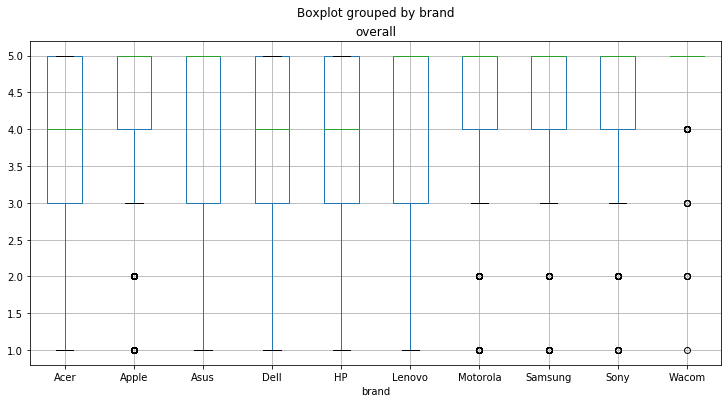

In [18]:
# source: https://github.com/Spugnam/amazon_reviews_scrapy/blob/master/amazon2/Amazon_Visualization_Final.ipynb
# Boxplot representing the ratings by brands.

subset_df_top_10_brands.boxplot(by='brand', column='overall', figsize=(12,6)) # using rating so each data point is a product

'''Analysis: The distribution of ratings is similar between Apple, Motorola, Samsung and Sony.
Question: Can we consider that these brands are similar? '''

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


'Analysis: We can see a number of interesting facts in this plot. First, Asus was at the top of tablets sales until\n2012, when Apple took the lead, and Asus experienced a steady decrease, although, keeping the second position during \nthe whole period. Some other companies such as Lenovo, Sony and Acer, were increasing sales, until 2013. In 2013 all \ncompanies saw their demand dwingle, expect for Samsung. Samsung was the only brand that kept and upward trend during \nthe whole period. '

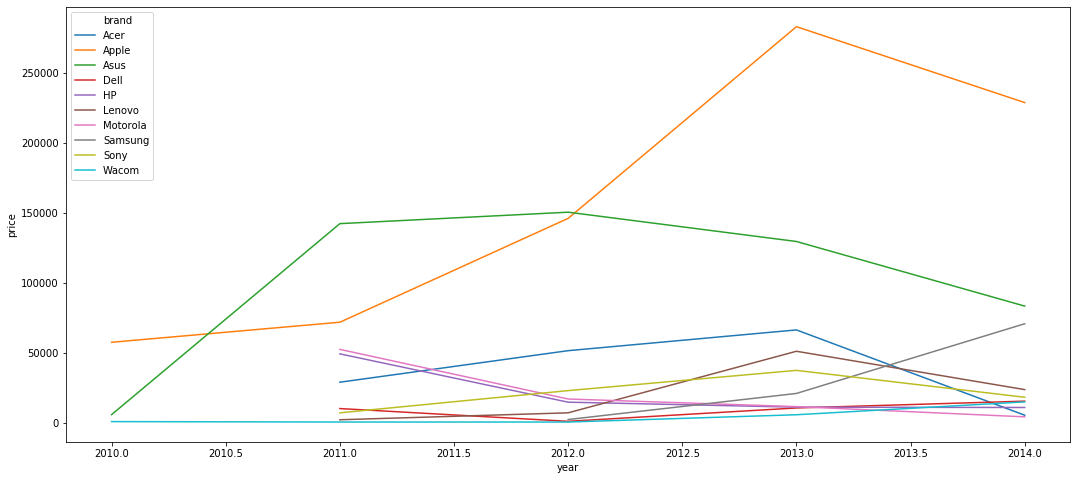

In [59]:
# creating a column to store the year of the review
subset_df_top_10_brands['year'] = pd.DatetimeIndex(subset_df_top_10_brands['timeFormat']).year

# reassigning the variable with data from 2010 onwards, because before that, there was not much data for tablets.
subset_df_top_10_brands = subset_df_top_10_brands[subset_df_top_10_brands['year'] > 2003]

# creating a new subset with brand, year and total sales (sales = sum of prices of each product, by brand)
sales_per_year_by_brand = subset_df_top_10_brands.groupby(['brand', 'year'])['price'].sum()

pd.DataFrame(sales_per_year_by_brand)

sales_per_year_by_brand = sales_per_year_by_brand.reset_index()

sns.lineplot(x='year', y='price', hue='brand', 
             data=sales_per_year_by_brand)

'''Analysis: We can see a number of interesting facts in this plot. First, Asus was at the top of tablets sales until
2012. Then, Apple took the lead, and Asus experienced a steady decrease. However, Asus kept the second position during 
the whole period. Some other companies such as Lenovo, Sony and Acer, were increasing sales, until 2013. After that, all 
companies saw their demand dwingle, except for Samsung. Samsung was the only brand that kept an upward trend during 
the whole period. '''

### 2.1.2) Product Analysis <a class="anchor" id="part2.1.2"></a>

'Analysis: We can see that Apple ipads dominate the market and are on the top of reviews, competing with Asus \ntablets. We could use the product descrition to find the features that the top 20 most reviewed tablets have.'

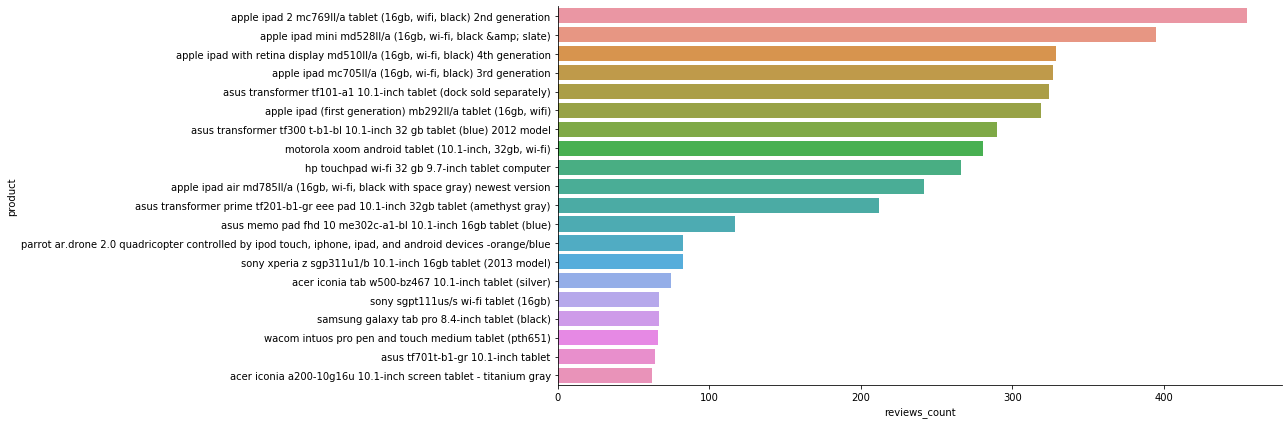

In [20]:
# Now let's look at the top most reviewed tablets.
top_20_products = pd.DataFrame(df_tab['title'].value_counts()[:20])
top_20_products.reset_index(inplace=True)
top_20_products.columns= ['product', 'reviews_count']
top_20_products


g2 = sns.catplot(x="reviews_count", y="product",
                data=top_20_products, kind="bar",
                height=6, aspect=3)

'''Analysis: We can see that Apple ipads dominate the market and are on the top of reviews, competing with Asus 
tablets. We could use the product descrition to find the features that the top 20 most reviewed tablets have.''' 

### 2.1.3) Feature Correlation Analysis <a class="anchor" id="part2.1.3"></a>

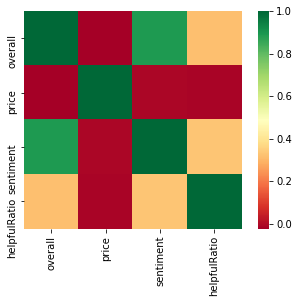

In [21]:
ax = sns.heatmap(df_tab.corr(), square=True, cmap='RdYlGn')
plt.show()

# From the heatmap we can see that:
# 1. price and the overall rating are inversely proportional.
# 2. sentiment and price are inversely proportional.
# 3. helpfulRatio and price are inversely proportional.
# 4. sentiment and the overall rating is directly proportional.

0.00043701738349410935


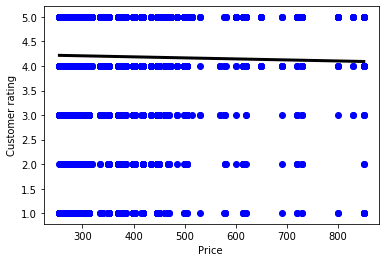

'Analysis: As we can see from the plot, there is a slight decrease in the rating given by a customer when the price paid for\na product is high. This means that customers get more demanding and more critical when they pay more \nfor a product.'

In [22]:
# Based on the previous heatmap, we decided to investigate the correlation between the overall rating and Price 
# using Linear Regression.

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_price = df_tab['price'].values.reshape(-1,1) 
y_overall = df_tab['overall'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_price), max(x_price)).reshape(-1,1)
# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_price, y_overall, test_size=0.3, random_state=42)

# Create the regression model: reg_all
reg = LinearRegression()

# Fit the regression to the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

# Print accuracy
print(reg.score(x_price, y_overall))

# Plot regression line
plt.scatter(x_price, y_overall, color='blue')
plt.plot(prediction_space, y_predict, color='black', linewidth=3)
plt.ylabel('Customer rating')
plt.xlabel('Price ')
plt.show()

'''Analysis: As we can see from the plot, there is a slight decrease in the rating given by a customer when the price paid for
a product is high. This means that customers get more demanding and more critical when they pay more 
for a product.'''

## 2.2) Sentiment Analysis <a class="anchor" id="part2.2"></a>

### 2.2.1) Sentiment analysis across time <a class="anchor" id="part2.2.1"></a>

In [ ]:
#import seaborn and matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)

#Main title
fig.suptitle("Comparing frequency using different scales")

#First ax title
ax[0].set_title("Using overall score")
#plot frequency count of overall score
sns.countplot(ax=ax[0],x="overall",data=df_tab,color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("Using sentiment score")
#ax[1].set_xtitle("")
#plot frequency count of response score
sns.countplot(ax=ax[1],x="sentiment",data=df_tab,color="g")
ax[1].set_xlabel("")

In [23]:
df_tab_time=df_tab.groupby("month_year").mean()
df_tab_time.reset_index(drop=False, inplace=True)
df_tab_time.head()

,month_year,overall,price,sentiment,helpfulRatio
0,2005-08,4.5,305.95,1.0,0.968750
1,2005-12,4.0,259.95,1.0,0.944444
2,2006-01,5.0,305.95,1.0,0.692308
3,2006-02,5.0,305.95,1.0,0.920000
4,2006-03,4.0,259.95,0.5,0.916084


In [24]:
df_tab_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   month_year    90 non-null     period[M]
 1   overall       90 non-null     float64  
 2   price         90 non-null     float64  
 3   sentiment     90 non-null     float64  
 4   helpfulRatio  86 non-null     float64  
dtypes: float64(4), period[M](1)
memory usage: 3.6 KB


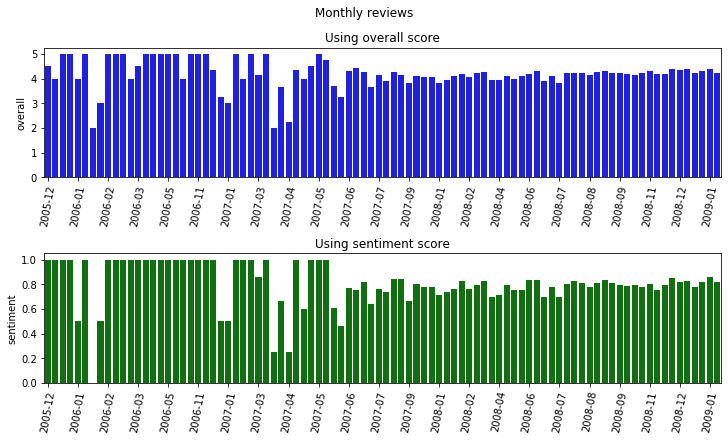

In [25]:
import matplotlib.dates as mdates

#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)
#fig.tight_layout()

#Main title
fig.suptitle("Monthly reviews")

#First ax title
ax[0].set_title("Using overall score")
#plot frequency count of overall score
sns.barplot(x="month_year",y="overall",data=df_tab_time,color="blue",ax=ax[0])

ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("Using sentiment score")
#plot frequency count of overall score
sns.barplot(x="month_year",y="sentiment",data=df_tab_time,color="green",ax=ax[1])

ax[1].set_xlabel("")


#Modify x tick labels, rotate 80 degrees and show every 4th element
for i in ax:
    i.xaxis.set_major_locator(ticker.MultipleLocator(4))
    i.set_xticklabels(i.get_xticklabels(), rotation=80)




plt.show()

### 2.2.2) TD-IDF Analysis for all dataset <a class="anchor" id="part2.2.2"></a>

In [26]:
#libraries for data analytics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#Each item on the list is a review
review_words= [x.strip() for x in df_tab["reviewText"]]
review_words[:5]

["I use this with both Corel Painter and Photoshop CS4. After a week of use I was sold on the Wacom Intuos3. The 6x8 pad is huge and I'm glad I did not get the larger one.Pros: very well built, pen is the most useful device. I love the way I can now pinpoint a touch up like the whites of an eye in a photograph.Cons: the mouse has a cheap feel to it and is slow. So I use a wireless Logitech mouse on the pad that seems to work better for me.Other thoughts: I ordered one before this with Free Shipping from Amazon. It did not arrive, lost somewhere between Sacramento and my house. Amazon refunded the money but it was frustrating.",
 'Great product for anyone that has to spend lots of time using a mouse on the computer.  The only problem with it is that it doesn\'t "wake up" from sleep with my mac running tiger.  You have to unplug and re-plug to get it going.My carpal tunnel hasn\'t acted up once since i started using this tablet.',
 "this is the real deal... simply... don't go cheap, cuz 

In [27]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

#fit the tfidf algorithm with review_words 
tfidf_an = tfidf.fit(review_words)
#transform to document-term matrix
corpus_tf_idf = tfidf_an.transform(review_words) 

sum_words_idf = corpus_tf_idf.sum(axis=0)
words_freq_idf = [(word, sum_words_idf[0, idx]) for word, idx in tfidf_an.vocabulary_.items()]

tfidf_df=pd.DataFrame(words_freq_idf,columns=["Word","Count"])
tfidf_df=tfidf_df.sort_values(by="Count",ascending=False)

tfidf_df.head(10)

,Word,Count
1380,ipad,307.491456
71,tablet,297.433875
0,use,180.875404
49,great,170.416221
100,screen,156.796739
24,like,150.494189
106,just,142.690142
1371,apple,137.418609
83,good,134.753073
20,love,122.588410


In [28]:
#intialise countvectoriser; stop words in English
cv = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an=cv.fit_transform(review_words)

#get the word names
sum_words_tf=cv.get_feature_names()
#term frequency of each word
count_words_tf=tf_an.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df=pd.DataFrame(list(zip(sum_words_tf,count_words_tf)),columns=["Word","Count"])
tf_df=tf_df.sort_values(by="Count",ascending=False)

tf_df.head(10)

,Word,Count
21234,tablet,10222
11927,ipad,9725
23085,use,5617
18924,screen,5212
12933,like,4747
12338,just,4441
10143,great,3675
2626,apps,3456
9966,good,3321
2565,apple,3115


Text(0.5, 0, '')

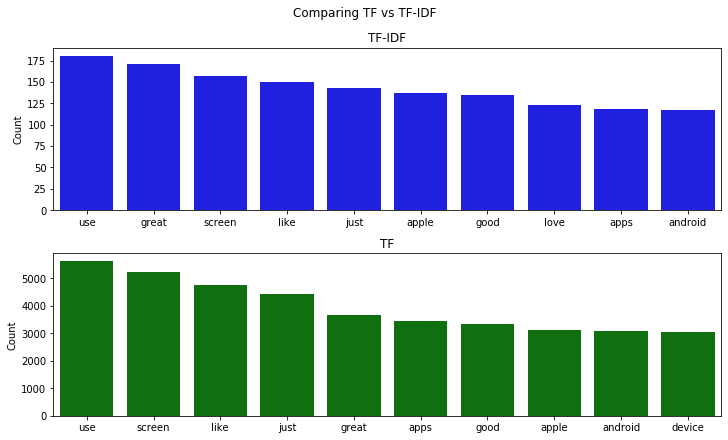

In [29]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)

#Main title
fig.suptitle("Comparing TF vs TF-IDF")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df.head(12).tail(10),color="g")
ax[1].set_xlabel("")



### 2.2.3) TF-IDF analysis for positive sentiment <a class="anchor" id="part2.2.3"></a>

In [30]:
#Each item on the list is a review

df_pos=df_tab[df_tab["sentiment"]==1]

review_words_pos= [x.strip() for x in df_pos["reviewText"]]
review_words_pos[:5]

["I use this with both Corel Painter and Photoshop CS4. After a week of use I was sold on the Wacom Intuos3. The 6x8 pad is huge and I'm glad I did not get the larger one.Pros: very well built, pen is the most useful device. I love the way I can now pinpoint a touch up like the whites of an eye in a photograph.Cons: the mouse has a cheap feel to it and is slow. So I use a wireless Logitech mouse on the pad that seems to work better for me.Other thoughts: I ordered one before this with Free Shipping from Amazon. It did not arrive, lost somewhere between Sacramento and my house. Amazon refunded the money but it was frustrating.",
 'Great product for anyone that has to spend lots of time using a mouse on the computer.  The only problem with it is that it doesn\'t "wake up" from sleep with my mac running tiger.  You have to unplug and re-plug to get it going.My carpal tunnel hasn\'t acted up once since i started using this tablet.',
 "this is the real deal... simply... don't go cheap, cuz 

In [31]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf_pos = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

# >>> vectorizer = TfidfVectorizer()
# >>> X = vectorizer.fit_transform(corpus)
# >>> print(vectorizer.get_feature_names())
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

#fit the tfidf algorithm with review_words 
tfidf_an_pos = tfidf_pos.fit(review_words_pos)
#transform to document-term matrix
corpus_tf_idf_pos = tfidf_an_pos.transform(review_words_pos) 

sum_words_idf_pos = corpus_tf_idf_pos.sum(axis=0)
words_freq_idf_pos = [(word, sum_words_idf_pos[0, idx]) for word, idx in tfidf_an_pos.vocabulary_.items()]

tfidf_df_pos=pd.DataFrame(words_freq_idf_pos,columns=["Word","Count"])
tfidf_df_pos=tfidf_df_pos.sort_values(by="Count",ascending=False)

tfidf_df_pos.head(10)

,Word,Count
1283,ipad,253.148368
71,tablet,236.267224
0,use,150.791563
49,great,148.249702
100,screen,121.197489
24,like,121.124455
106,just,110.917429
83,good,110.333065
1306,apple,109.893859
20,love,109.808059


In [32]:
#intialise countvectoriser; stop words in English
cv_pos = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an_pos=cv_pos.fit_transform(review_words_pos)

#get the word names
sum_words_tf_pos=cv_pos.get_feature_names()
#term frequency of each word
count_words_tf_pos=tf_an_pos.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df_pos=pd.DataFrame(list(zip(sum_words_tf_pos,count_words_tf_pos)),columns=["Word","Count"])
tf_df_pos=tf_df_pos.sort_values(by="Count",ascending=False)

tf_df_pos.head(10)

,Word,Count
10408,ipad,7870
18566,tablet,7849
20175,use,4566
16552,screen,3915
11300,like,3734
10760,just,3335
8851,great,3197
2235,apps,2844
8689,good,2607
2012,android,2448


Text(0.5, 0, '')

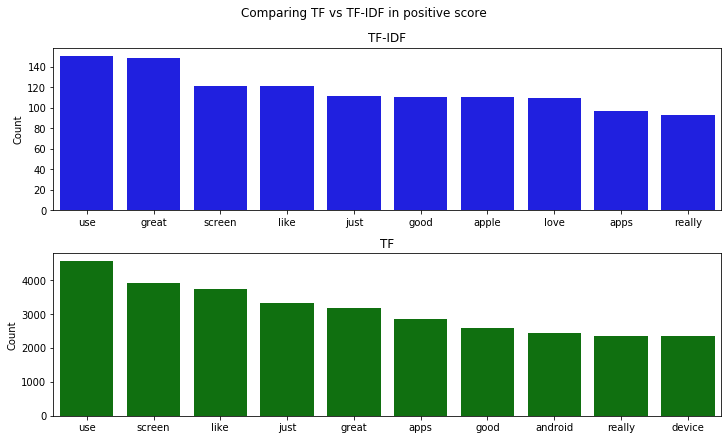

In [33]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)

#Main title
fig.suptitle("Comparing TF vs TF-IDF in positive score")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df_pos.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df_pos.head(12).tail(10),color="g")
ax[1].set_xlabel("")



### 2.2.4) TF-IDF analysis for negative sentiment  <a class="anchor" id="part2.2.4"></a>

In [34]:
#Each item on the list is a review

df_neg=df_tab[df_tab["sentiment"]==0]

review_words_neg= [x.strip() for x in df_neg["reviewText"]]
review_words_neg[:5]

['The reason I\'m giving this tablet two stars is to call attention to this model\'s design flaw, which is the USB cable/port. Although tablets are a great addition to the graphics professional, and one you really can\'t work w/o, the Intuous USB cable will eventually fail internally (This happens on the Intuous 4 also). It\'s simply lacking in quality control. Mine started failing after 2 years and now has completely failed. The Intuous 4 USB port has a similar quality control issue.Everything else about this tablet is 5 stars, but you can\'t use it w/o the cable. And for quality control issues, it gets a three star reduction. When you buy an Intuous, just be aware that you may be replacing it after a couple of years, and according to searches for "Intuous 4 USB port", perhaps a year before failure.Edit:11/24/2011After first writing this review, I disassembled the tablet and resoldered the USB connection. It worked fine until just a few weeks ago.My Intuos 3 has now failed completely 

In [35]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf_neg = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

#fit the tfidf algorithm with review_words 
tfidf_an_neg = tfidf_neg.fit(review_words_neg)
#transform to document-term matrix
corpus_tf_idf_neg = tfidf_an_neg.transform(review_words_neg) 

sum_words_idf_neg = corpus_tf_idf_neg.sum(axis=0)
words_freq_idf_neg = [(word, sum_words_idf_neg[0, idx]) for word, idx in tfidf_an_neg.vocabulary_.items()]

tfidf_df_neg=pd.DataFrame(words_freq_idf_neg,columns=["Word","Count"])
tfidf_df_neg=tfidf_df_neg.sort_values(by="Count",ascending=False)

tfidf_df_neg.head(10)

,Word,Count
2,tablet,64.977305
297,ipad,56.105578
118,screen,37.543479
40,just,33.521676
997,asus,32.157973
34,use,31.851440
239,like,31.106832
205,apple,29.119064
165,good,25.960988
85,device,25.483210


In [36]:
#intialise countvectoriser; stop words in English
cv_neg = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an_neg=cv_neg.fit_transform(review_words_neg)

#get the word names
sum_words_tf_neg=cv_neg.get_feature_names()
#term frequency of each word
count_words_tf_neg=tf_an_neg.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df_neg=pd.DataFrame(list(zip(sum_words_tf_neg,count_words_tf_neg)),columns=["Word","Count"])
tf_df_neg=tf_df_neg.sort_values(by="Count",ascending=False)

tf_df_neg.head(10)

,Word,Count
10432,tablet,2373
5798,ipad,1855
9248,screen,1297
5966,just,1106
11270,use,1051
6258,like,1013
1127,apple,795
1267,asus,794
4826,good,714
3187,device,695


Text(0.5, 0, '')

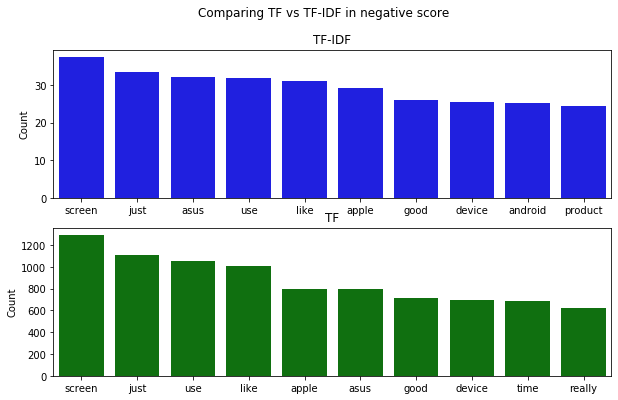

In [37]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6))

#Main title
fig.suptitle("Comparing TF vs TF-IDF in negative score")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df_neg.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df_neg.head(12).tail(10),color="g")
ax[1].set_xlabel("")

## 2.3) Time Series Analysis  <a class="anchor" id="part2.3"></a>

### 2.3.1) Cyclical Events  <a class="anchor" id="part2.3.1"></a>

In [ ]:
#Group by timeFormat column
#Apply -> sentiment: mean and count; overall: mean
ser_tab_time=df_tab.groupby("timeFormat").agg({"sentiment":["mean","count"], "overall":"mean"})
#Drop one level of column names
ser_tab_time.columns = ser_tab_time.columns.droplevel()

#find min and max datetime
min_date=min(ser_tab_time.index)
max_date=max(ser_tab_time.index)

#reindex the series and filling missing dates with np.nan
ser_tab_time=ser_tab_time.reindex(pd.date_range( min_date, max_date), fill_value=np.nan)

#renaming the columns
ser_tab_time.columns=["s_mean","s_count","o_mean"]

#Sampling the values into months
#Apply the same criteria for the functions
df_tab_month=ser_tab_time.resample("M").agg({"s_mean":"mean","s_count":"sum","o_mean":"mean"})
df_tab_month.head(5)

In [ ]:
#There are some months without reviews. In addition, it can be seen a peak of sales after 2010.
#Makes sense considering that Apple release the iPad in April 3, 2010
#https://en.wikipedia.org/wiki/IPad_(1st_generation)#:~:text=The%20Wi%2DFi%20version%20of,was%20released%20on%20April%2030.

fig , ax = plt.subplots()

#ax.plot_date(df_tab_month.index.to_pydatetime(), df_tab_month["s_count"])
#graph a barplot for the time series
ax.bar(df_tab_month.index.to_pydatetime(), df_tab_month["s_count"], width=30)
#define the xaxis as date
ax.xaxis_date()

#change the x axis format 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
#rotate the x ticks
plt.xticks(rotation=60)
plt.tight_layout()

plt.show()

In [38]:
#source: https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
df_tab['timeFormat'].min(), df_tab['timeFormat'].max()

(Timestamp('2005-08-02 00:00:00'), Timestamp('2014-07-23 00:00:00'))

In [39]:
df_tab_ordered = df_tab.sort_values('timeFormat')
df_tab_ordered.isnull().sum()

reviewerID         0
asin               0
reviewText         0
overall            0
summary            0
timeFormat         0
description        5
categories         0
title              0
price              0
related            0
brand              0
sentiment          0
helpfulRatio    1575
month_year         0
dtype: int64

In [40]:
df_tab_ordered = df_tab_ordered.groupby('timeFormat')['price'].sum().reset_index()
df_tab_ordered = df_tab_ordered.set_index('timeFormat')
df_tab_ordered.index

DatetimeIndex(['2005-08-02', '2005-12-15', '2006-01-06', '2006-02-01',
               '2006-03-02', '2006-03-09', '2006-05-04', '2006-05-17',
               '2006-11-04', '2007-01-03',
               ...
               '2014-07-14', '2014-07-15', '2014-07-16', '2014-07-17',
               '2014-07-18', '2014-07-19', '2014-07-20', '2014-07-21',
               '2014-07-22', '2014-07-23'],
              dtype='datetime64[ns]', name='timeFormat', length=1425, freq=None)

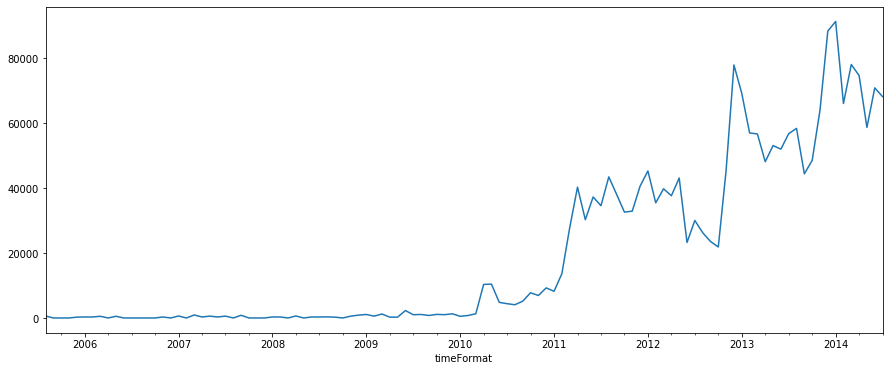

In [41]:

# We assume that the sum of the prices of products that were reviewed in a certain month represent the
# total sales in that month. 
y = df_tab_ordered['price'].resample('MS').sum()

# in the resample function we used the argument 'MS' for the parameter 'role'. 
# in the resample function, 'MS' refers to month start frequency, which was the timestamp used for this analysis.

y.plot(figsize=(15, 6))
plt.show()

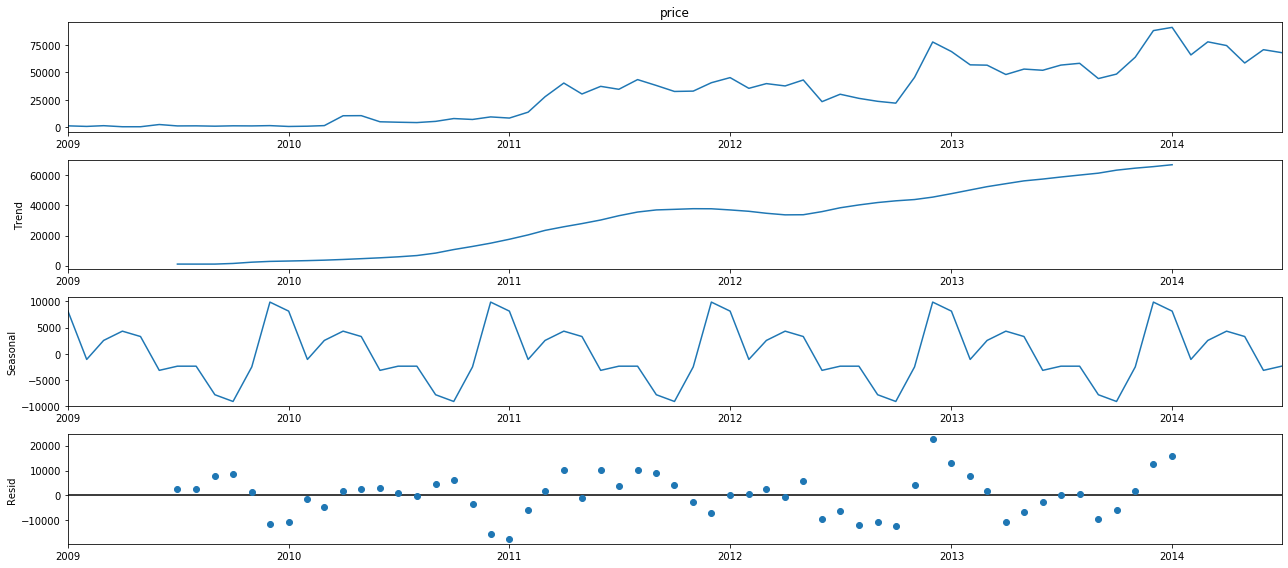

In [42]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8

# Because the function seasonal_decompose() does not handle missing values, we will take data starting from 2009.
decomposition = sm.tsa.seasonal_decompose(y['2009':], model='additive')
fig = decomposition.plot()
plt.show()

In [43]:
'''The plot shows that the tablet sales have an overall upward trend. It also suggests a seasonality pattern, mostly 
associated with the months that Apple has new releases. This pattern started after Apple launched its first iPad in 
April 2010. As we can see from the plot, there is the first peak in tablet sales during this time. An even more 
significant peak happens in March 2011, when Apple launches iPad 2. In the following year, tablet sales are unstable 
and experiences a slight decrease in purchases. However, in November 2013 we see a new significant 
peak, most likely associated with Apple releasing 2 new iPads (iPad Air and iPad Mini 2). 

From this plot we can infer that Apple releases play a tremendous impact in the overall sales of tablets.'''


'The plot shows that the tablet sales have an overall upward trend. It also suggests a seasonality pattern, mostly \nassociated with the months that Apple has new releases. This pattern started after Apple launched its first iPad in \nApril 2010. As we can see from the plot, there is the first peak in tablet sales during this time. An even more \nsignificant peak happens in March 2011, when Apple launches iPad 2. In the following year, tablet sales are unstable \nand experiences a slight decrease in purchases. However, in November 2013 we see a new significant \npeak, most likely associated with Apple releasing 2 new iPads (iPad Air and iPad Mini 2). \n\nFrom this plot we can infer that Apple releases play a tremendous impact in the overall sales of tablets.'

In [44]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [45]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2528.6106194845015
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2223.720218619317
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2102.1654454394884
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1851.4934567019347
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2096.5496423735312
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2075.772644036886
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1864.9018780707559
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1836.6530701755107
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2432.3501318306367
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2150.566584845091
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2032.5892774487945
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1782.5940142967656
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2184.1727677819044
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2139.924116151999
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1824.5674327890931
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1778.7201496375835
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2190.404905358273
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1948.78040579829

In [46]:
# From the output we can see that the SARIMAX (1, 1, 1)x(1, 1, 1, 12) gives us the most optimal option with the
# AIC value of 1686.55. Therefore, we will use it.

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6740      0.140      4.817      0.000       0.400       0.948
ma.L1         -0.8818      0.094     -9.372      0.000      -1.066      -0.697
ar.S.L12       0.1471      0.348      0.422      0.673      -0.536       0.830
ma.S.L12      -0.6565      0.343     -1.916      0.055      -1.328       0.015
sigma2      6.071e+07   2.49e-09   2.44e+16      0.000    6.07e+07    6.07e+07


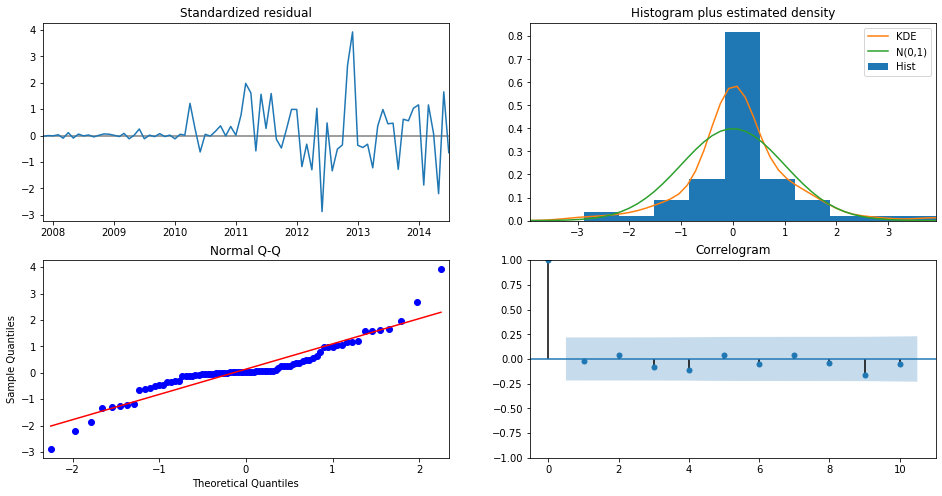

In [47]:
# Now we will use the diagnostics method to explore possible uncommon behaviour.
results.plot_diagnostics(figsize=(16, 8))
plt.show()

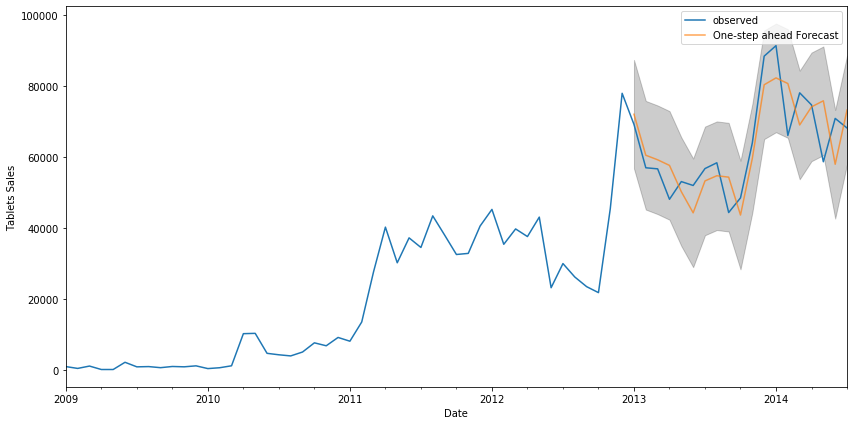

In [48]:
pred = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2009':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Tablets Sales')
plt.legend()
plt.show()

In [49]:
# create a copy of the dataframe, and add columns for month and year
df_tablets = df_tab[['timeFormat', 'price']].set_index('timeFormat')
df_tablets['month'] = [i.month for i in df_tablets.index]
df_tablets['year'] = [i.year for i in df_tablets.index]
# group by month and year, get the sum
df_tablets = df_tablets.groupby(['month', 'year']).sum()
df_tablets = df_tablets.unstack(level=0)
df_tablets.dropna(inplace=True)
df_tablets

price                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2009    1076.95    562.95   1223.80    257.00    257.00   2286.65   1004.85   
2010     514.00    755.94   1300.95  10332.00  10422.98   4806.99   4394.92   
2011    8212.96  13616.81  27758.00  40293.82  30270.39  37274.59  34574.24   
2012   45275.75  35465.56  39784.95  37644.01  43110.90  23254.27  30046.80   
2013   69172.37  56984.63  56684.28  48123.19  53100.60  52006.60  56761.80   

                                                         
month        8         9         10        11        12  
year                                                     
2009    1076.95    771.00   1105.95   1012.94   1285.00  
2010    4078.98   5175.99   7758.99   6928.97   9271.94  
2011   43460.62  38074.68  32599.03  32907.80  40598.55  
2012   26272.20  23556.18  21875.91  45514.22  77929.13  
2013   58391.72  44397.23  48515.43  63996.23  88375.28

In [50]:
# create a copy of the dataframe, and add columns for month and year
df_reviews_year = df_tab[['timeFormat', 'price']].set_index('timeFormat')
df_reviews_year['month'] = [i.month for i in df_reviews_year.index]
df_reviews_year['year'] = [i.year for i in df_reviews_year.index]
# group by month and year, get the count
df_reviews_year = df_reviews_year.groupby(['month', 'year']).count()

df_reviews_year = df_reviews_year.unstack(level=0)
#Dropping null values for the months
df_reviews_year.dropna(inplace=True)

df_reviews_year

price                                                                 \
month     1      2      3      4      5      6      7      8      9      10   
year                                                                          
2009     4.0    2.0    4.0    1.0    1.0    7.0    3.0    4.0    3.0    4.0   
2010     2.0    2.0    4.0   28.0   28.0   13.0   12.0   11.0   14.0   21.0   
2011    19.0   30.0   72.0  112.0   78.0   93.0   95.0  125.0  109.0   93.0   
2012   120.0   95.0  102.0  105.0  125.0   71.0   86.0   76.0   67.0   60.0   
2013   181.0  155.0  153.0  126.0  145.0  143.0  161.0  161.0  126.0  138.0   

                     
month     11     12  
year                 
2009     3.0    5.0  
2010    19.0   25.0  
2011    89.0  113.0  
2012   123.0  207.0  
2013   172.0  241.0

In [51]:
df_reviews_year.sum(axis=1)

year
2009      41.0
2010     179.0
2011    1028.0
2012    1237.0
2013    1902.0
dtype: float64

In [52]:
df_tablets


price                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2009    1076.95    562.95   1223.80    257.00    257.00   2286.65   1004.85   
2010     514.00    755.94   1300.95  10332.00  10422.98   4806.99   4394.92   
2011    8212.96  13616.81  27758.00  40293.82  30270.39  37274.59  34574.24   
2012   45275.75  35465.56  39784.95  37644.01  43110.90  23254.27  30046.80   
2013   69172.37  56984.63  56684.28  48123.19  53100.60  52006.60  56761.80   

                                                         
month        8         9         10        11        12  
year                                                     
2009    1076.95    771.00   1105.95   1012.94   1285.00  
2010    4078.98   5175.99   7758.99   6928.97   9271.94  
2011   43460.62  38074.68  32599.03  32907.80  40598.55  
2012   26272.20  23556.18  21875.91  45514.22  77929.13  
2013   58391.72  44397.23  48515.43  63996.23  88375.28

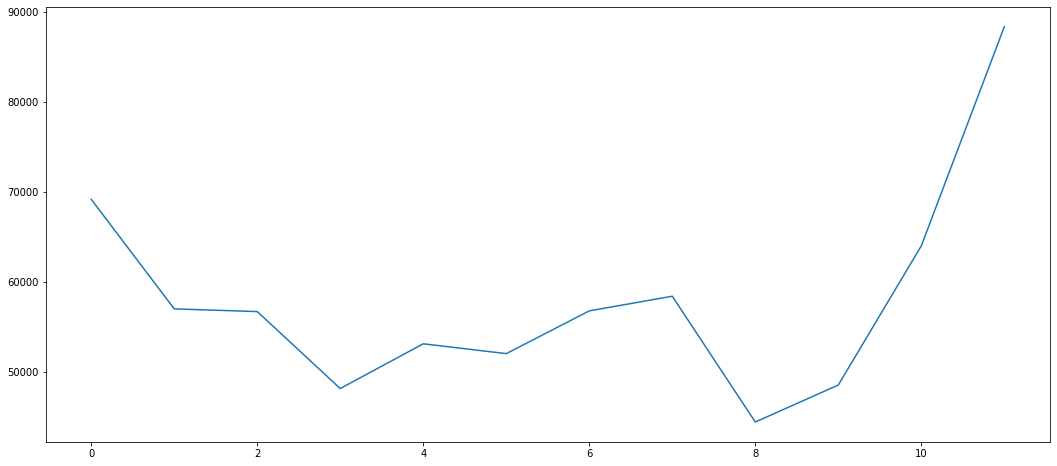

In [53]:
#Grabbing the values of the last row (year 2013)
list_sales = df_tablets.iloc[-1].values[:]

#Creating a list with the months
#list_months = ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
list_months = range(1,13)

#Zipping both lists and creating a dataframe
list_of_tuples = list(zip(list_months, list_sales)) 
df_2013 = pd.DataFrame(list_of_tuples, columns = ['Period', 'Sales']) 

plt.plot(df_2013['Sales'])
plt.show()

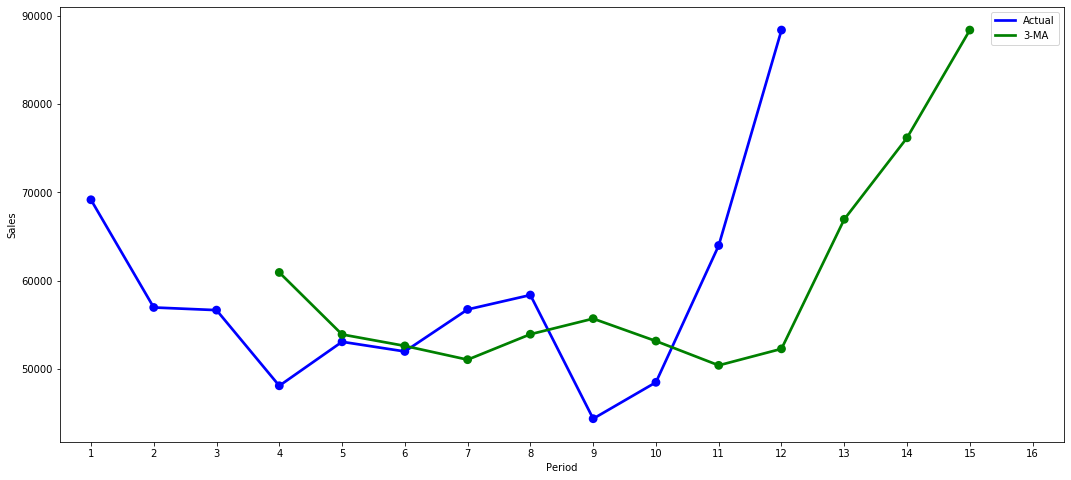

In [54]:
# Using moving average
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['Period','Sales'])
    num_df = len(df)
    for m in range(0, to_period):
        if m < k:
            sale_predict = float('nan')
        else:
            history = df['Sales'][m-k:m]
            sale_predict = history.mean()
        moving_average_df.loc[m] = [m+1, sale_predict]
    
    moving_average_df['Period'] = moving_average_df['Period'].astype(int)
    return moving_average_df

f, ax = plt.subplots(1, 1)
ma_df = moving_average(df_2013, 3, 16)
sns.pointplot(x='Period', y='Sales', data=df_2013, color='b')
sns.pointplot(x='Period', y='Sales', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df_2013)+1], labels=["Actual", "3-MA"])
plt.show()

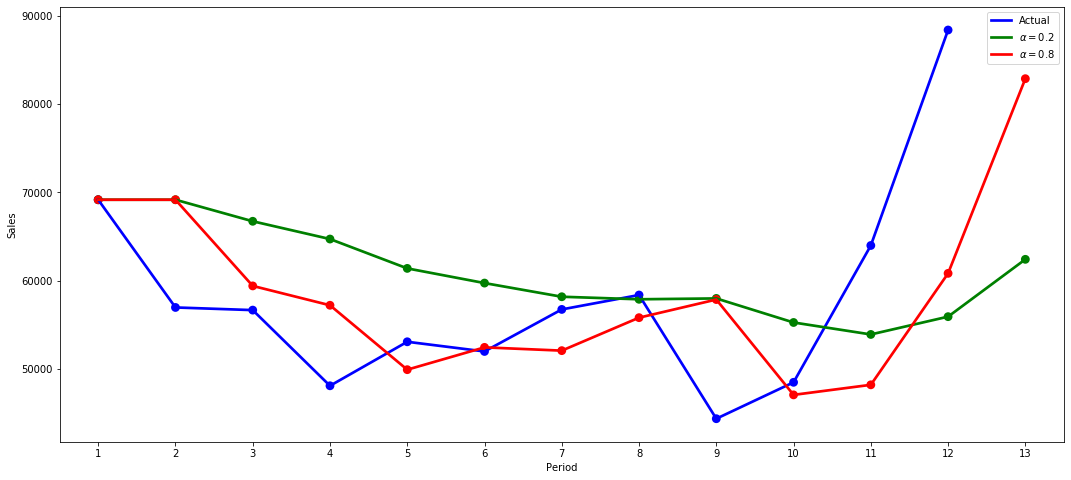

In [55]:
def exponential_smoothing(df, alpha):
    es_df = pd.DataFrame(columns=['Period','Sales'])
    es_df.loc[0] = [1, df['Sales'][0]]
    num_df = len(df)
    for m in range(0, num_df):
        sale_predict = alpha * df['Sales'][m] + (1-alpha) * es_df['Sales'][m]
        es_df.loc[m+1] = [m+2, sale_predict]
        
    es_df['Period'] = es_df['Period'].astype(int)
    return es_df

f, ax = plt.subplots(1, 1)
es_df_02 = exponential_smoothing(df_2013, 0.2)
es_df_08 = exponential_smoothing(df_2013, 0.8)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df_2013, color='b')
sns.pointplot(ax=ax, x='Period', y='Sales', data=es_df_02, color='g')
sns.pointplot(ax=ax, x='Period', y='Sales', data=es_df_08, color='r')

ax.legend(handles=ax.lines[::len(df_2013)+2], labels=["Actual", r'$\alpha=0.2$', r"$\alpha=0.8$"])
plt.show()

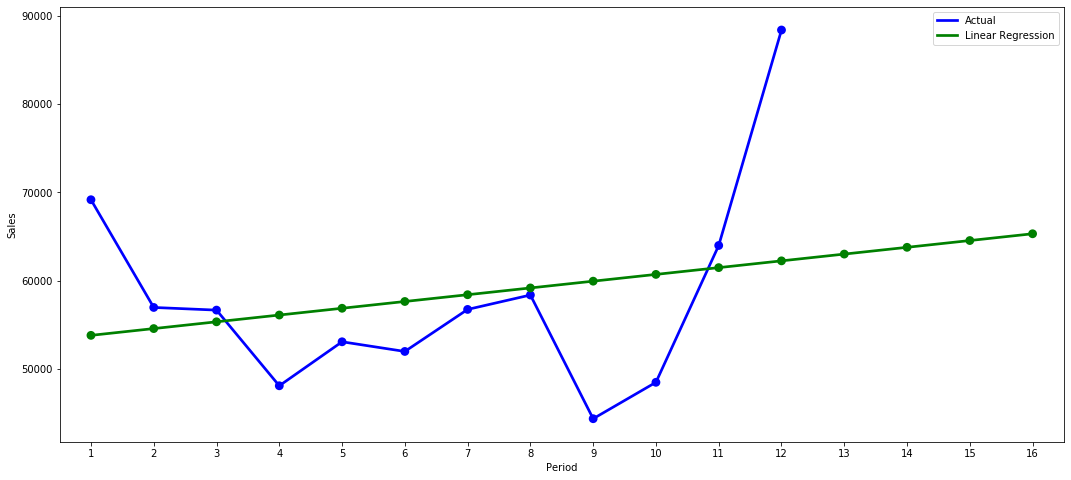

In [56]:
def linear_regression(df):
    linear_df = df.copy()
    linear_df['PeriodSales'] = linear_df['Period'] * linear_df['Sales'] 
    linear_df['Period_2'] = linear_df['Period'] * linear_df['Period']
    linear_df['Sales_2'] = linear_df['Sales'] * linear_df['Sales']
    linear_sum = linear_df.sum()
    linear_mean = linear_df.mean()
    
    b = (linear_sum['PeriodSales'] - len(df) * linear_mean['Period'] * linear_mean['Sales']) \
        / (linear_sum['Period_2']- len(df) * linear_mean['Period'] * linear_mean['Period'])
    a = linear_mean['Sales'] - b * linear_mean['Period']
    return a,b


a,b = linear_regression(df_2013)
linear_df = pd.DataFrame(columns=['Period','Sales'])
for m in range(1, 17):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df_2013, color='b')
sns.pointplot(ax=ax, x='Period', y='Sales', data=linear_df, color='g')

ax.legend(handles=ax.lines[::len(df_2013)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RankWarning: Polyfit may be poorly conditioned


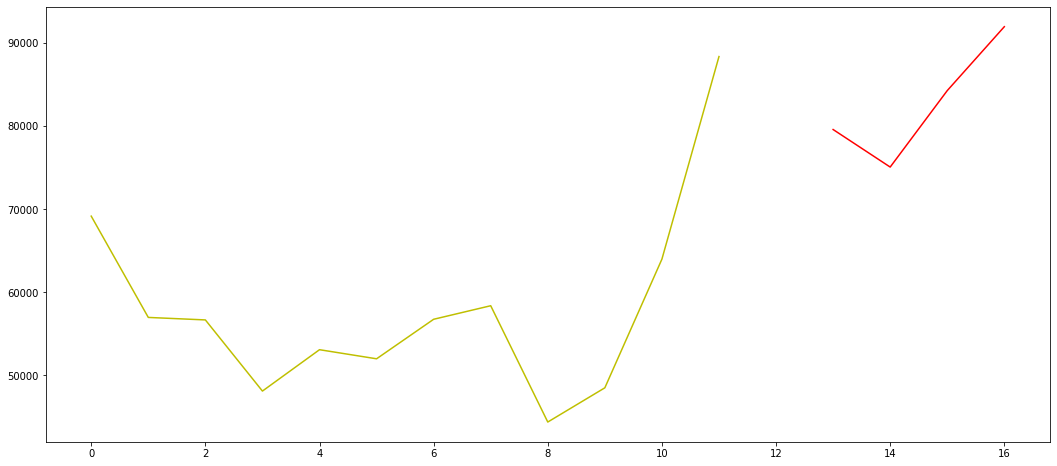

In [57]:
#season function
def get_season(row):
    if row['Period'] >= 5 and row['Period'] <= 8:
        return 'II'
    elif row['Period'] >= 9 and row['Period'] <= 12:
        return 'III'
    else:
        return 'I'
def get_seq(row):
    return row['Period']%4 and row['Period']%4 or 4

def predict_with_seasonality(df, months):
    new_df = df.copy()
    new_df['Season'] = new_df.apply(get_season, axis=1)
    new_df['Seq'] = new_df.apply(get_seq, axis=1)
    
    season_df = pd.DataFrame((new_df.pivot('Seq','Season')['Sales']).to_records())
    season_df.index = season_df['Seq']
    season_df = season_df.drop(['Seq'], axis=1)
    
    avg_df = season_df.apply(np.mean)
    
    seasonal_index_df = pd.DataFrame(columns=['I','II','III'])
    seasonal_index_df['I'] = season_df['I']/avg_df['I']
    seasonal_index_df['II'] = season_df['II']/avg_df['II']
    seasonal_index_df['III'] = season_df['III']/avg_df['III']
    seasonal_index_df['Avg'] = seasonal_index_df.mean(axis=1)
    
    season = np.array([1,2,3])
    avg_arr = np.array([avg_df['I'], avg_df['II'], avg_df['III']])
    fit = np.polyfit(season, avg_arr, 3)
    poly = np.poly1d(fit)
    average_predict = poly(4)
    forecast_df = pd.DataFrame(columns=['Period','Sales'])
    
    forecast_df['Sales'] = seasonal_index_df['Avg']*average_predict
    forecast_df['Period'] = months
#     forecast_df.index = forecast_df['Period']
    forecast_df.index = np.array(months) - 1
    return forecast_df

season_df = predict_with_seasonality(df_2013, [13,14,15,16])

f, ax = plt.subplots(1, 1)
plt.plot(df_2013['Sales'], c='y')
plt.plot(season_df['Period'], season_df['Sales'], c='r')
plt.show()

In [58]:
''' THIS COULD BE THE ANSWER TO QUESTION 4 (OPTIONAL)'''

# ##### TRYING TO CREATE A CALPLOT

# df_tab_copy = df_tab.copy()

# df_tab_copy.set_index('timeFormat', inplace=True)
# df_tab_copy.head()

# list_ones = np.ones(df_tab_copy.shape[0])

# df_tab_copy.dropna()

# df_tab_copy['count'] = list_ones

# import calplot # https://github.com/tomkwok/calplot
# # plot

# calplot.calplot(df_tab_copy['price'], how='sum')

' THIS COULD BE THE ANSWER TO QUESTION 4 (OPTIONAL)'